# Tracking Data Analysis - Denis Dervishi

In this analysis tracking data for the Champions League Final 2023 (Manchester City 1 -  0 Inter Milan) is used to show and compare Edin Džeko's and Romelu Lukaku's attacking runs. Loading in the necessary libraries and the tracking data. Keeping only in-possession forward runs.

In [ ]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from mplsoccer import Pitch
import numpy as np
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
df_runs = pd.read_parquet("18768058_runs.parquet")
df_runs = df_runs.loc[df_runs["In possession runs"] == True]
df_runs = df_runs.loc[df_runs["Forward runs"] == True]

Adding run angle and run distance to the df_runs dataframe.

In [ ]:
df_runs["delta_x"] = df_runs["end_x"] - df_runs["start_x"]
df_runs["delta_y"] = df_runs["end_y"] - df_runs["start_y"]

df_runs["Run_Distance"] = np.sqrt(df_runs["delta_x"]**2 + df_runs["delta_y"]**2)
df_runs["Run_Angle"] = np.degrees(np.arctan2(df_runs["delta_y"], df_runs["delta_x"]))

Separating all runs made by Edin Džeko and plotting them on the football pitch.

Text(0.5, 1.0, "Edin Džeko's forward runs in possession")

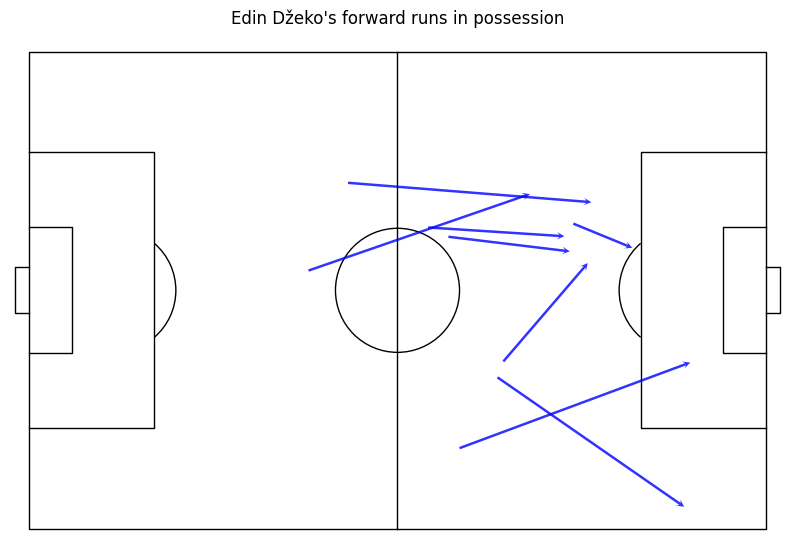

In [ ]:
attacking_runs = df_runs[df_runs["player"] == "Edin Džeko"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
pitch = Pitch(pitch_type="opta",
              goal_type="box",
              pitch_color="w",
              linewidth=1,
              spot_scale=0,
              line_color="k",
              line_zorder=1)

pitch.draw(ax)

for idx, row in attacking_runs.iterrows():
    pitch.arrows(row["start_x"], row["start_y"],
            row["end_x"], row["end_y"],
            width=1.8,
            headwidth=3, headlength=3, headaxislength=2,
            color="blue",
            linewidth=1,
            alpha=0.8,
            zorder=3,
            ax=ax)

ax.set_title("Edin Džeko's forward runs in possession")

Calculating the average distance and angle of Edin Džeko's runs.

In [ ]:
average_start_x = attacking_runs["start_x"].mean()
average_start_y = attacking_runs["start_y"].mean()

average_end_x = attacking_runs["end_x"].mean()
average_end_y = attacking_runs["end_y"].mean()

average_distance = attacking_runs["Run_Distance"].mean()
average_angle = attacking_runs["Run_Angle"].mean()

distance_std = np.std(attacking_runs["Run_Distance"])
angle_std = np.std(attacking_runs["Run_Angle"])

line1_angle =  average_angle + angle_std
line2_angle = average_angle - angle_std

line1_slope = np.tan(np.radians(line1_angle))
line2_slope = np.tan(np.radians(line2_angle))

y3 = average_start_y + line1_slope * (average_end_x + distance_std - average_start_x)
y4 = average_start_y + line2_slope * (average_end_x + distance_std - average_start_x)

y1 = average_start_y + line1_slope * (average_end_x - distance_std - average_start_x)
y2 = average_start_y + line2_slope * (average_end_x - distance_std - average_start_x)

Plotting the average run together with a shaded area representing the standard deviation of distance and angle.

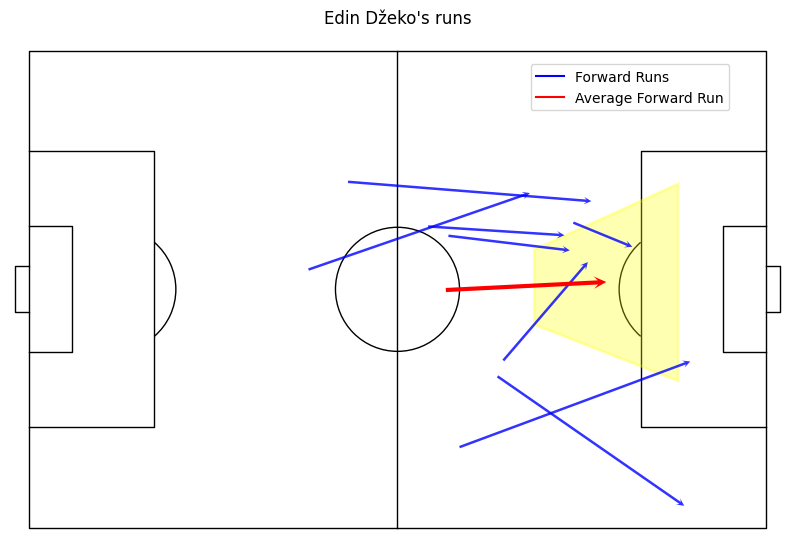

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
pitch = Pitch(pitch_type="opta",
              goal_type="box",
              pitch_color="w",
              linewidth=1,
              spot_scale=0,
              line_color="k",
              line_zorder=1)

pitch.draw(ax)

for idx, row in attacking_runs.iterrows():
        pitch.arrows(row["start_x"], row["start_y"],
                      row["end_x"], row["end_y"],
                      width=1.8,
                      headwidth=3, headlength=3, headaxislength=2,
                      color="blue",
                      linewidth=1,
                      alpha=0.8,
                      zorder=3,
                      ax=ax)

pitch.arrows(average_start_x, average_start_y,
                      average_end_x, average_end_y,
                      width=3,
                      headwidth=3, headlength=3, headaxislength=2,
                      color="red",
                      linewidth=4,
                      alpha=1,
                      zorder=3,
                      ax=ax)


point1 = (average_end_x - distance_std, y1)
point2 = (average_end_x - distance_std , y2)
point3 = (average_end_x + distance_std , y3)
point4 = (average_end_x + distance_std , y4)
points = [point2, point1, point3, point4]

polygon = Polygon(points, closed=True, color="yellow", edgecolor="black", linewidth=2,alpha=0.3,)
ax.add_patch(polygon)

ax.set_title("Edin Džeko's runs")

plt.plot([], [], color="blue", label="Forward Runs")  
plt.plot([], [], color="red", label="Average Forward Run")
plt.legend(loc="upper center", bbox_to_anchor=(0.8, 0.95))

#plt.savefig("Džeko_runs.jpg",dpi = 500)
plt.show()

Lukaku replaced Džeko in the 57th minute due to injury. Trying to see if there was any significant difference in the runs between the two players in this game. Plotting Lukaku's runs on the football pitch.

Text(0.5, 1.0, "Romelu Lukaku's forward runs in possession")

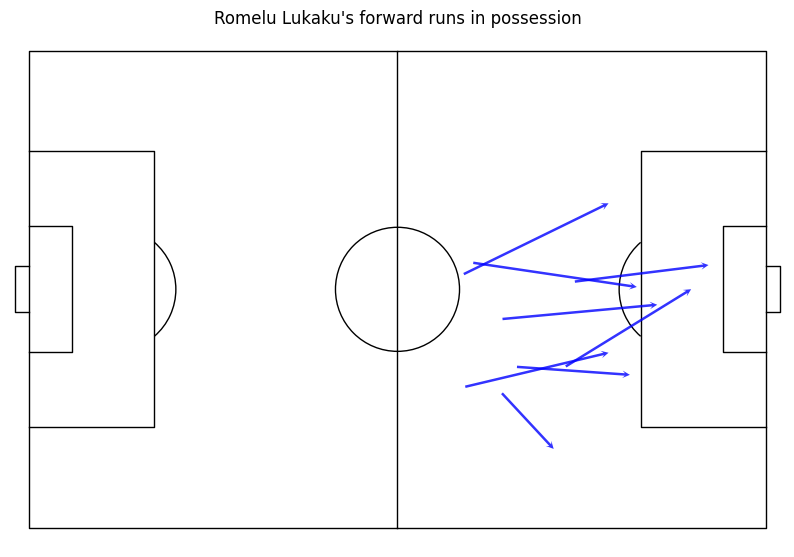

In [ ]:
attacking_runs = df_runs[df_runs["player"] == "Romelu Lukaku"]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
pitch = Pitch(pitch_type="opta",
              goal_type="box",
              pitch_color="w",
              linewidth=1,
              spot_scale=0,
              line_color="k",
              line_zorder=1)

pitch.draw(ax)

for idx, row in attacking_runs.iterrows():
        pitch.arrows(row["start_x"], row["start_y"],
                      row["end_x"], row["end_y"],
                      width=1.8,
                      headwidth=3, headlength=3, headaxislength=2,
                      color="blue",
                      linewidth=1,
                      alpha=0.8,
                      zorder=3,
                      ax=ax)

ax.set_title("Romelu Lukaku's forward runs in possession")

Calculating the average distance and angle of Lukaku's runs.

In [ ]:
average_start_x = attacking_runs["start_x"].mean()
average_start_y = attacking_runs["start_y"].mean()

average_end_x = attacking_runs["end_x"].mean()
average_end_y = attacking_runs["end_y"].mean()

average_distance = attacking_runs["Run_Distance"].mean()
average_angle = attacking_runs["Run_Angle"].mean()

distance_std = np.std(attacking_runs["Run_Distance"])
angle_std = np.std(attacking_runs["Run_Angle"])

line1_angle =  average_angle + angle_std
line2_angle = average_angle - angle_std

line1_slope = np.tan(np.radians(line1_angle))
line2_slope = np.tan(np.radians(line2_angle))

y3 = average_start_y + line1_slope * (average_end_x + distance_std - average_start_x)
y4 = average_start_y + line2_slope * (average_end_x + distance_std - average_start_x)

y1 = average_start_y + line1_slope * (average_end_x - distance_std - average_start_x)
y2 = average_start_y + line2_slope * (average_end_x - distance_std - average_start_x)

Plotting the average run together with a shaded area representing the standard deviation of distance and angle.

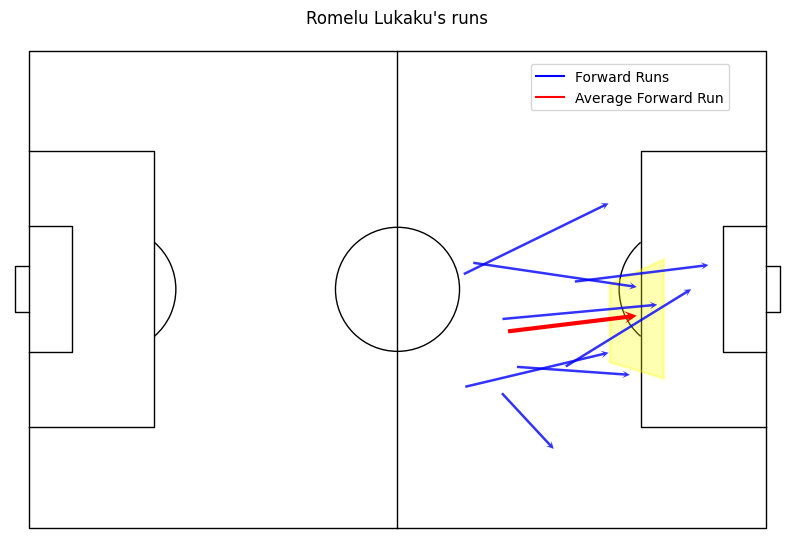

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))
pitch = Pitch(pitch_type="opta",
              goal_type="box",
              pitch_color="w",
              linewidth=1,
              spot_scale=0,
              line_color="k",
              line_zorder=1)

pitch.draw(ax)

for idx, row in attacking_runs.iterrows():
        pitch.arrows(row["start_x"], row["start_y"],
                      row["end_x"], row["end_y"],
                      width=1.8,
                      headwidth=3, headlength=3, headaxislength=2,
                      color="blue",
                      linewidth=1,
                      alpha=0.8,
                      zorder=3,
                      ax=ax)

pitch.arrows(average_start_x, average_start_y,
                      average_end_x, average_end_y,
                      width=3,
                      headwidth=3, headlength=3, headaxislength=2,
                      color="red",
                      linewidth=4,
                      alpha=1,
                      zorder=3,
                      ax=ax)


point1 = (average_end_x - distance_std, y1)
point2 = (average_end_x - distance_std , y2)
point3 = (average_end_x + distance_std , y3)
point4 = (average_end_x + distance_std , y4)
points = [point2, point1, point3, point4]

polygon = Polygon(points, closed=True, color="yellow", edgecolor="black", linewidth=2,alpha=0.3,)
ax.add_patch(polygon)

ax.set_title("Romelu Lukaku's runs")

plt.plot([], [], color="blue", label="Forward Runs")  
plt.plot([], [], color="red", label="Average Forward Run")
plt.legend(loc="upper center", bbox_to_anchor=(0.8, 0.95))

#plt.savefig("Lukaku_runs.jpg",dpi = 500)
plt.show()

Now we should compare the difference in runs (distance and angle) between Džeko and Lukaku using boxplots.

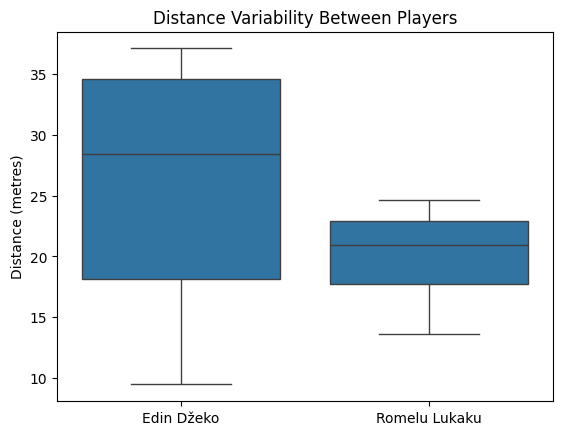

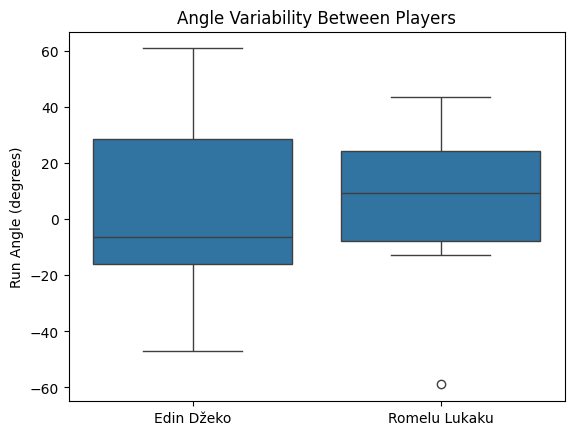

In [ ]:
players = ["Edin Džeko", "Romelu Lukaku"]
df_filtered = df_runs[df_runs["player"].isin(players)]

sns.boxplot(data=df_filtered, x="player", y="Run_Distance")
plt.title("Distance Variability Between Players")
plt.ylabel("Distance (metres)")
plt.xlabel("")
#plt.savefig("Boxplot_Distance.jpg",dpi = 500)
plt.show()

sns.boxplot(data=df_filtered, x="player", y="Run_Angle")
plt.title("Angle Variability Between Players")
plt.ylabel("Run Angle (degrees)")
plt.xlabel("")
#plt.savefig("Boxplot_Angle.jpg",dpi = 500)
plt.show()